## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [5]:
# Load up the wine dataset
wine = load_wine() 
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [15]:
# check for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [46]:
# scale 
X = df.values
X_cent = X - X.mean(axis=0)
X_std = X_cent / X.std(axis=0)

In [51]:
# Run pca on dataframe
pca = PCA()
components = pca.fit_transform(X_std)


In [52]:
var = pca.explained_variance_
var

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

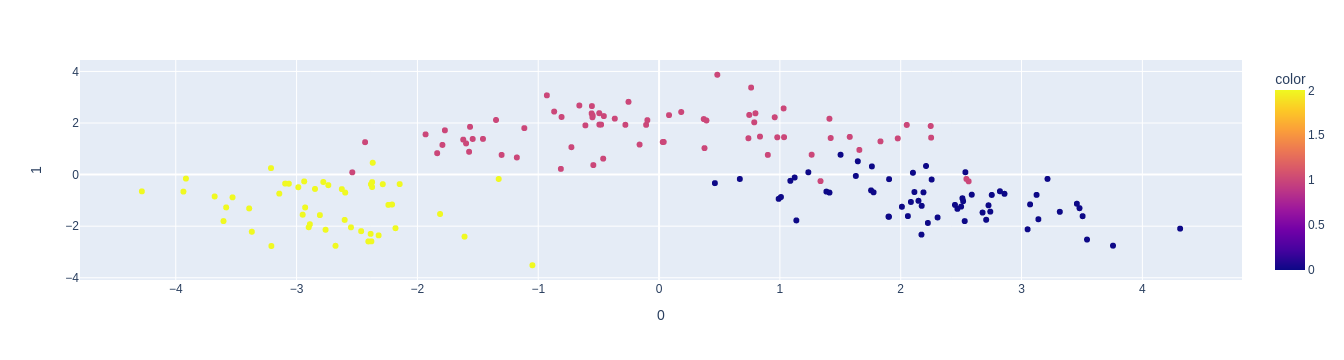

In [53]:
# plot 2d PCA scatter plot 
fig = px.scatter(components[:,:2], x=0, y=1, color=wine.target)
fig.show()

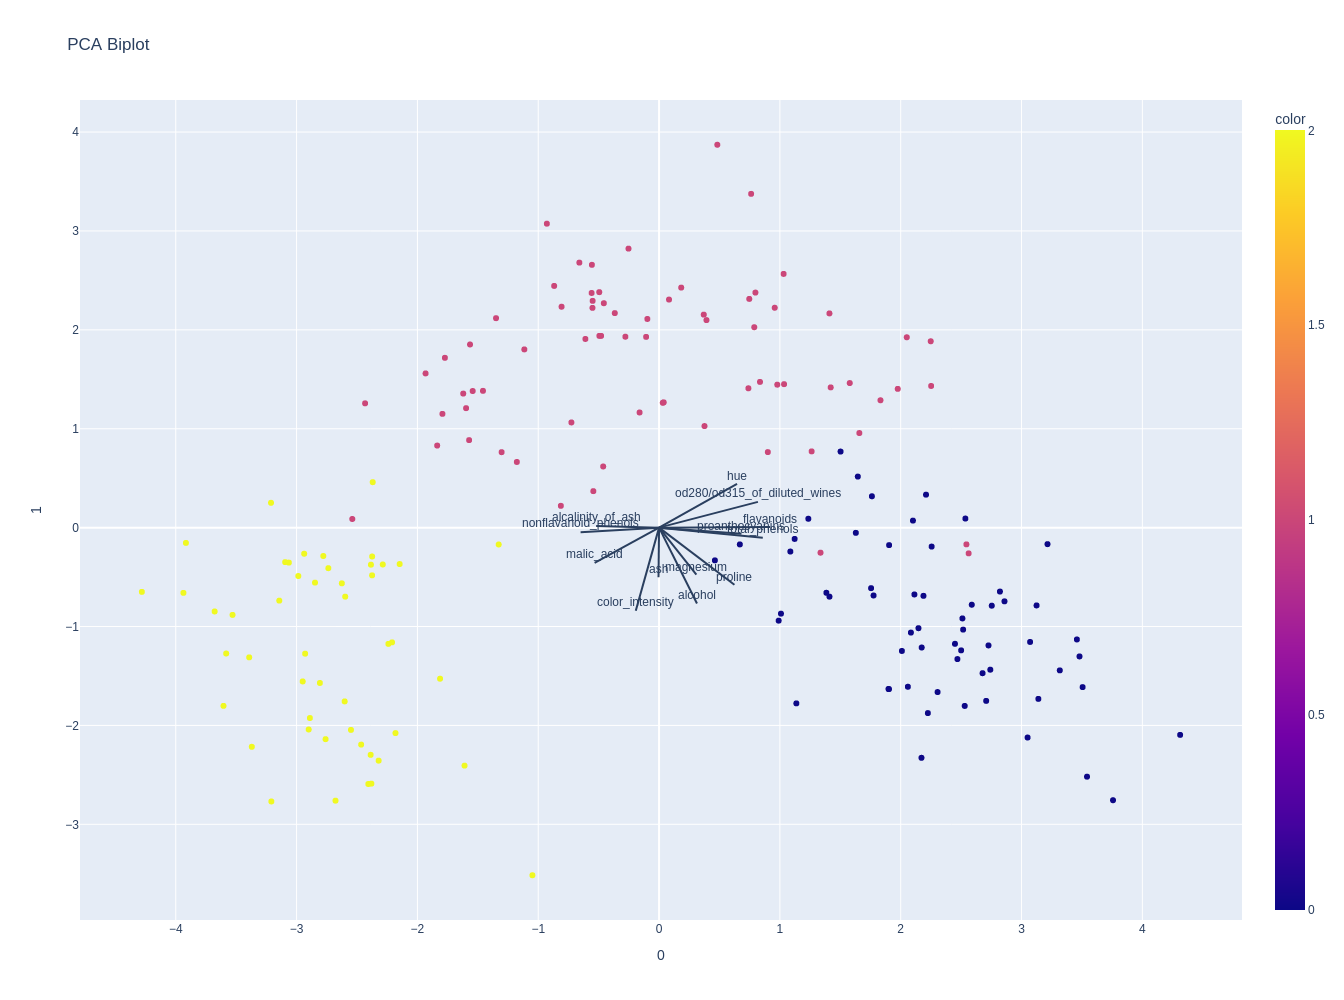

In [54]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=wine.target,width=1000, height=1000, title="PCA Biplot")

for i, feature in enumerate(df.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

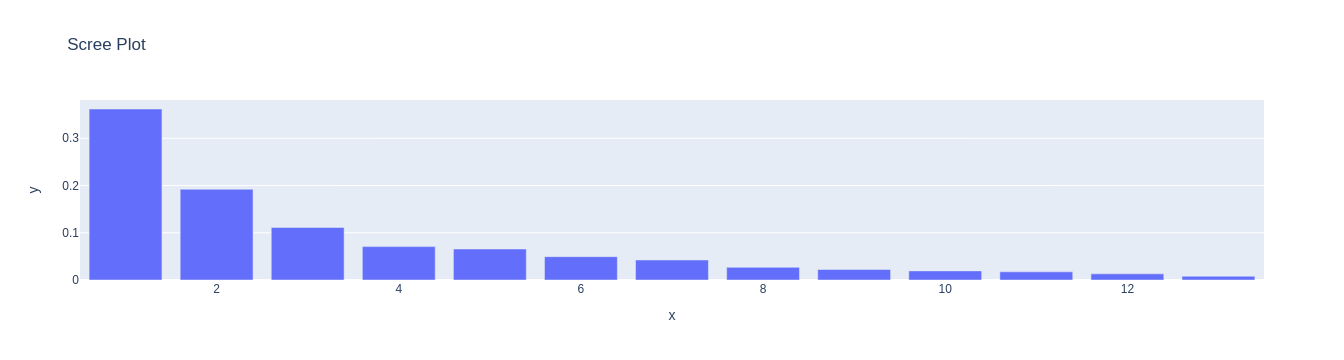

In [55]:
# plot scree
PC_values = np.arange(pca.n_components_) + 1
fig = px.bar(x=PC_values, y =pca.explained_variance_ratio_, title='Scree Plot')

fig.show()

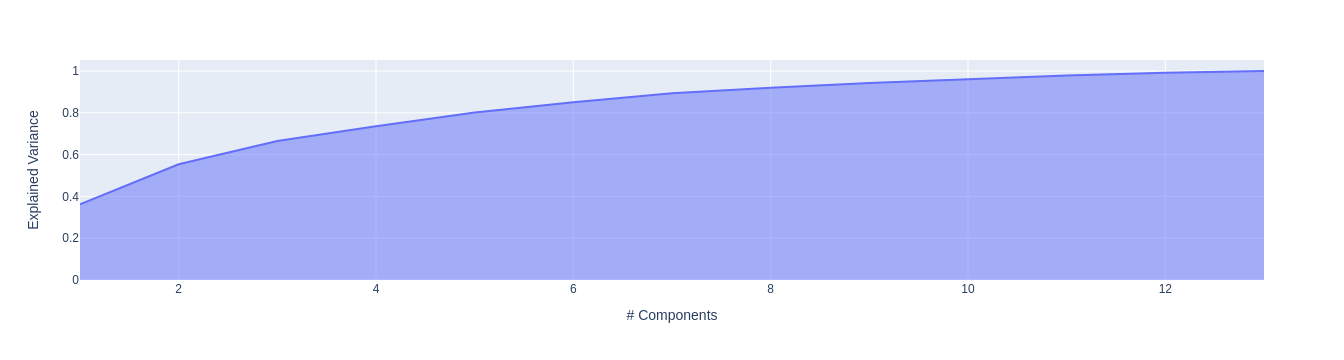

In [57]:
# cumulative explained variance plot

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)


In [64]:
# refit with 3 components
# Run pca on dataframe
pca = PCA(n_components=3)
components = pca.fit_transform(X_std)
comp_df = pd.DataFrame(components, columns=['PCA 1', 'PCA 2', 'PCA 3'])
comp_df

,PCA 1,PCA 2,PCA 3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [65]:
comp_df.to_csv('component_3')

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.